# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load Data

In [2]:
df = pd.read_csv("../data/PostTypeAnalysisDateset.csv", parse_dates=["post_date"])

# Basic Inspection

In [3]:
df.head()

,post_date,entity_id,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate
0,2020-01-02 17:10:00,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NaN,36023.36585,123,3,42,0.000693
1,2020-01-02 17:46:00,7AD030340F434EECA5B4FC28034E1113,242458.0,False,False,NaN,23402.68323,4,0,0,0.000017
2,2020-10-09 16:06:00,4AAFEFB838974FDCA41932C4D32FD52A,2102820.0,False,False,NaN,204639.92030,24,1,2,0.000013
3,2020-10-09 16:08:00,4AAFEFB838974FDCA41932C4D32FD52A,2102820.0,False,False,NaN,208872.73630,91,1,2,0.000045
4,2020-10-10 13:00:00,4A3372EBDC9C484AA8503A96CD14B858,1023570.0,False,False,NaN,136020.57130,465,9,2,0.000465


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15141 entries, 0 to 15140
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   post_date            15141 non-null  datetime64[ns]
 1   entity_id            15141 non-null  object        
 2   followers            15127 non-null  float64       
 3   is_picture           15141 non-null  bool          
 4   is_video             15141 non-null  bool          
 5   video_duration_secs  1989 non-null   float64       
 6   impressions          15127 non-null  float64       
 7   likes                15141 non-null  int64         
 8   shares               15141 non-null  int64         
 9   replies              15141 non-null  int64         
 10  engagement_rate      15141 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 1.1+ MB


### There are some nulls

In [5]:
df.isnull().sum()

post_date                  0
entity_id                  0
followers                 14
is_picture                 0
is_video                   0
video_duration_secs    13152
impressions               14
likes                      0
shares                     0
replies                    0
engagement_rate            0
dtype: int64

### Specifics above

# Deep Dive into `post_date`

In [6]:
lastest_date, earliest_date = max(df["post_date"]), min(df["post_date"])
print(earliest_date, lastest_date)

2020-01-01 05:01:00 2020-12-16 04:02:00


In [7]:
df[df["post_date"].dt.second != 0].shape # confirming that seconds aren't accounted for

(0, 11)

In [8]:
df["post_date"].isnull().sum()

0

### Posts in this dataset are from the year 2020, January 1st to December 16th
### Pretty granular, precision to the minute
### No NaN times

# Deep Dive into `entity_id`

In [9]:
df["entity_id"].nunique() # there are only 5 accounts this dataset covers

5

In [10]:
df["entity_id"].unique() # confirming the hash means nothing to me

array(['7AD030340F434EECA5B4FC28034E1113',
       '4AAFEFB838974FDCA41932C4D32FD52A',
       '4A3372EBDC9C484AA8503A96CD14B858',
       '734CC11FE5EC4290A623F16482B387FF',
       '40B1ADC3F6F54143BACCB3D8FB000756'], dtype=object)

In [11]:
df["entity_id"].value_counts() # check distribution of posts by account

4A3372EBDC9C484AA8503A96CD14B858    8228
4AAFEFB838974FDCA41932C4D32FD52A    2550
7AD030340F434EECA5B4FC28034E1113    2317
734CC11FE5EC4290A623F16482B387FF    1121
40B1ADC3F6F54143BACCB3D8FB000756     925
Name: entity_id, dtype: int64

In [12]:
df["entity_id"].isnull().sum()

0

### There are only 5 accounts and account `4A3372EBDC9C484AA8503A96CD14B858` has by far the most posts. The others are relativley even
### No NaNs in entit_ id

# Deep Dive into `followers`

In [13]:
df["followers"].describe() # some descriptive stats

count    1.512700e+04
mean     1.292527e+06
std      1.091380e+06
min      2.420370e+05
25%      9.004100e+05
50%      9.583550e+05
75%      1.065397e+06
max      5.149433e+06
Name: followers, dtype: float64

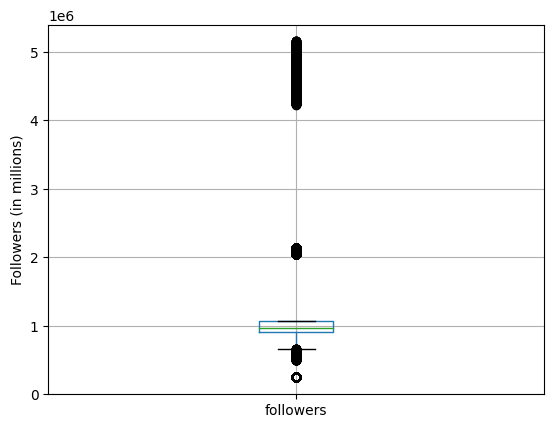

In [14]:
follow_bbplot = df.boxplot("followers")
follow_bbplot.set_ylabel("Followers (in millions)")
plt.show()

## Look at how `followers` interacts with `entity_id`

Is there a difference in followers by account?

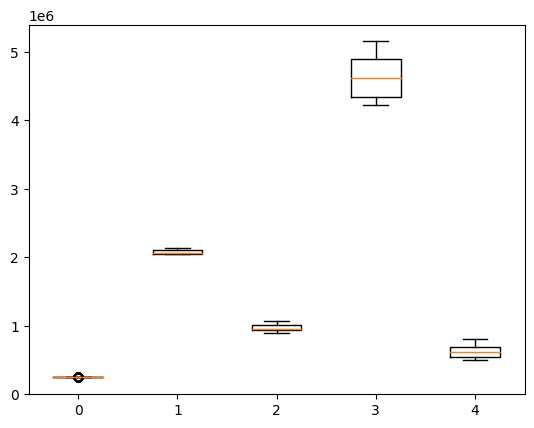

In [15]:
followers_by_account = []
for account in df["entity_id"].unique():
    temp = df[df["entity_id"] == account].dropna(subset=["followers"]).copy()
    followers_by_account.append(temp["followers"])
plt.boxplot(followers_by_account, labels=range(0, 5))
plt.show()

### The above graph is in milions, also the x value corresponds to index in df["entity_id"].unique()
### There's a pretty big difference in followers by account

## Look at how `followers` by `entity_id` change over time

In [16]:
group_on_acc = []
for name in df["entity_id"].unique():
    group_on_acc.append(
        df[df["entity_id"] == name].dropna(
            subset=["followers"]
        ).sort_values(axis=0, by="post_date").reset_index(
        ).copy())

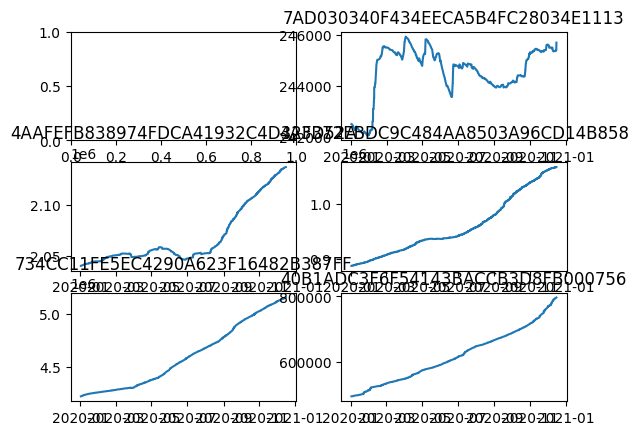

In [17]:
fig, ax = plt.subplots(3, 2)
row, col = 0, 0
for idx in range(len(group_on_acc)):
    if (idx % 2) == 0:
        col = 1
    else:
        col = 0
        row += 1
    ax[row, col].plot(group_on_acc[idx]["post_date"], group_on_acc[idx]["followers"])
    ax[row, col].set_title(group_on_acc[idx]["entity_id"][0])
    # row += 1
plt.show()

# df.groupby("entity_id").plot("post_date", "followers", title=df["entity_id"][0])
# plt.show()

### All except the last account seem to follow a general upward trend. May not want to do what last account does as it's quite volatile

## Look at growth rate by account over time

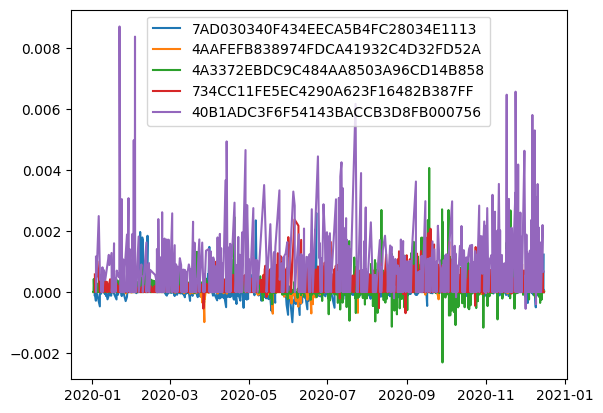

In [18]:
# for no good reason, i cant make changes to a groupby fo growth rate by acc is not possible to do programatically
for frame in group_on_acc:
    frame["growth_rate"] = frame["followers"].diff() / frame["followers"]
    plt.plot(frame["post_date"], frame["growth_rate"], label=frame["entity_id"][0])
plt.legend()
plt.show()

# Look into NaNs more
- for 14 posts, followers and impressions are NaN so probably drop them
- a-lot of video duration is NaN, probably fine I reckon it's because video = False

In [19]:
# df[df.is_video == False].shape # yeah that's why
df[df.is_picture & df.is_video].shape, df[~df.is_picture & ~df.is_video].shape, df[~df.is_picture & df.is_video].shape, df[df.is_picture & ~df.is_video].shape, df.shape, 8464 + 1989 + 4688 == 15141

((0, 11), (8464, 11), (1989, 11), (4688, 11), (15141, 11), True)

# How do videos do vs non-videos?

In [20]:
df[df.is_picture].shape, df[df.is_video].shape

((4688, 11), (1989, 11))

In [21]:
df.is_video.value_counts()

False    13152
True      1989
Name: is_video, dtype: int64

In [22]:
# df.engagement_rate.hist(by=df.is_video)

In [23]:
# df[df.is_video].engagement_rate.plot.density(), df[~df.is_video].engagement_rate.plot.density()

In [24]:
# df.corr()

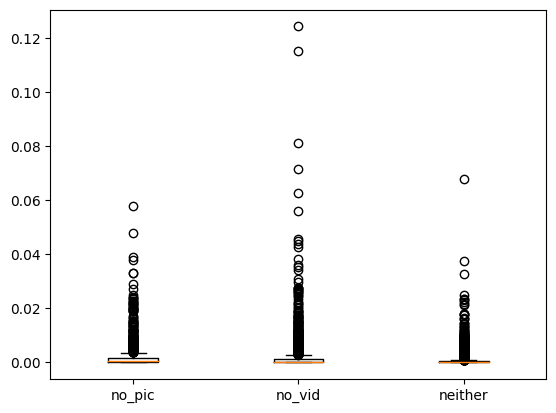

In [25]:
no_pic = df[~df.is_picture & df.is_video].copy()
no_vid = df[df.is_picture & ~df.is_video].copy()
neither = df[~df.is_picture & ~df.is_video].copy()
plt.boxplot([no_pic["engagement_rate"], no_vid["engagement_rate"], neither["engagement_rate"]], labels=["no_pic", "no_vid", "neither"])
plt.show()

5

# Checking if normal

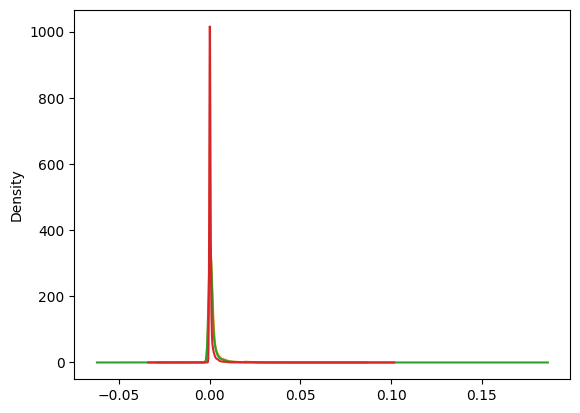

In [28]:
no_pic["engagement_rate"].plot(kind="density")
no_vid["engagement_rate"].plot(kind="density")
neither["engagement_rate"].plot(kind="density")
plt.show()

In [41]:
# sm.qqplot(no_pic["engagement_rate"])
# sm.qqplot(no_vid["engagement_rate"])
# sm.qqplot(neither["engagement_rate"])

In [42]:
no_pic.shape, no_vid.shape, neither.shape

((1989, 11), (4688, 11), (8464, 11))

In [45]:
no_pic["engagement_rate"].var(), no_vid["engagement_rate"].var(), neither["engagement_rate"].var()

(1.5901347379456925e-05, 1.997595619301904e-05, 2.949481824952034e-06)

In [47]:
from scipy.stats import levene

In [48]:
_, p = levene(no_pic["engagement_rate"], no_vid["engagement_rate"], neither["engagement_rate"])

In [50]:
p # variances are sufficiently different such that anova on these is not possible. this could be seen 2 lines above but levene also proves this

3.463621340078473e-67

In [51]:
no_pic["engagement_rate"].mean(), no_vid["engagement_rate"].mean(), neither["engagement_rate"].mean()

(0.0018259087184514832, 0.0014344954417662118, 0.0005508373804347826)

In [52]:
no_pic.head()

,post_date,entity_id,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate
13,2020-09-10 22:56:00,734CC11FE5EC4290A623F16482B387FF,4817853.0,False,True,22.584,652087.09970,2836,136,0,0.000617
19,2020-08-10 15:02:00,4A3372EBDC9C484AA8503A96CD14B858,963831.0,False,True,20.117,108949.36340,118,5,7,0.000135
33,2020-09-05 00:01:00,4A3372EBDC9C484AA8503A96CD14B858,983701.0,False,True,9.233,397672.10280,4668,401,0,0.005153
40,2020-09-05 14:01:00,4A3372EBDC9C484AA8503A96CD14B858,983701.0,False,True,26.927,123381.56000,227,12,0,0.000243
53,2020-01-02 21:01:00,7AD030340F434EECA5B4FC28034E1113,242458.0,False,True,80.914,48394.19151,138,15,0,0.000631


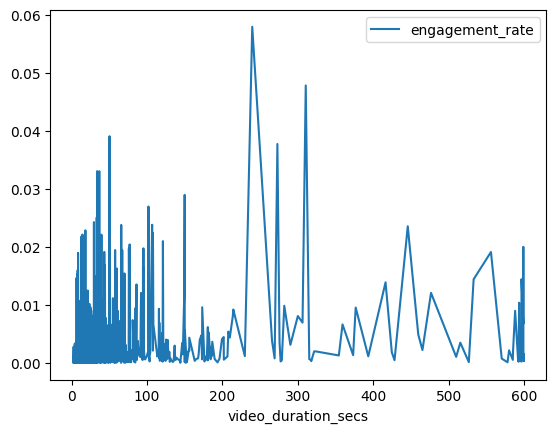

In [55]:
no_pic.sort_values(by="video_duration_secs").plot("video_duration_secs", "engagement_rate")
plt.show()

In [56]:
no_pic.corr() # slight positive correlation

,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate
followers,1.000000,NaN,NaN,0.106794,0.759387,0.337022,0.236157,0.209083,-0.120304
is_picture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
video_duration_secs,0.106794,NaN,NaN,1.000000,0.189965,0.190438,0.153070,0.070784,0.218934
impressions,0.759387,NaN,NaN,0.189965,1.000000,0.859052,0.743432,0.444805,0.437217
likes,0.337022,NaN,NaN,0.190438,0.859052,1.000000,0.857742,0.502612,0.723401
shares,0.236157,NaN,NaN,0.153070,0.743432,0.857742,1.000000,0.530307,0.608309
replies,0.209083,NaN,NaN,0.070784,0.444805,0.502612,0.530307,1.000000,0.293094
engagement_rate,-0.120304,NaN,NaN,0.218934,0.437217,0.723401,0.608309,0.293094,1.000000


In [59]:
no_pic["video_duration_secs"].describe()

count    1989.000000
mean       46.753339
std        77.592069
min         1.867000
25%        15.751000
50%        26.650000
75%        45.002000
max       599.724000
Name: video_duration_secs, dtype: float64

In [63]:
bins = range(0, 610, 10)
no_pic["bin"] = no_pic["video_duration_secs"].apply(binner)

In [62]:
def binner(x):
    for group in bins:
        if x < group:
            return group

In [64]:
no_pic.head(1)

,post_date,entity_id,followers,is_picture,is_video,video_duration_secs,impressions,likes,shares,replies,engagement_rate,bin
13,2020-09-10 22:56:00,734CC11FE5EC4290A623F16482B387FF,4817853.0,False,True,22.584,652087.0997,2836,136,0,0.000617,30


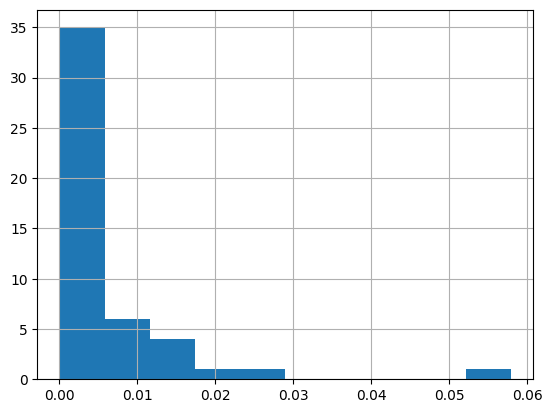

In [70]:
no_pic.groupby("bin")["engagement_rate"].mean().hist()
plt.show()
# i have a graph, this vidually shows there's a difference between duration lengths and engagement
# test between groups

In [75]:
no_pic.groupby("bin").corr()

followers  is_picture  is_video  video_duration_secs  \
bin                                                                             
10  followers             1.000000         NaN       NaN             0.076154   
    is_picture                 NaN         NaN       NaN                  NaN   
    is_video                   NaN         NaN       NaN                  NaN   
    video_duration_secs   0.076154         NaN       NaN             1.000000   
    impressions           0.812583         NaN       NaN             0.169219   
...                            ...         ...       ...                  ...   
600 impressions           0.504819         NaN       NaN            -0.006121   
    likes                -0.677907         NaN       NaN             0.155893   
    shares               -0.620703         NaN       NaN             0.126059   
    replies              -0.292810         NaN       NaN             0.453134   
    engagement_rate      -0.727474         NaN       NaN             0.174234   

                         impressions     likes    shares   replies  \
bin                                                                  
10  followers               0.812583  0.357004  0.082393  0.319587   
    is_picture                   NaN       NaN       NaN       NaN   
    is_video                     NaN       NaN       NaN       NaN   
    video_duration_secs     0.169219  0.212619  0.128507  0.190170   
    impressions             1.000000  0.828216  0.608265  0.518134   
...                              ...       ...       ...       ...   
600 impressions             1.000000  0.277713  0.288896  0.517618   
    likes                   0.277713  1.000000  0.868922  0.751330   
    shares                  0.288896  0.868922  1.000000  0.745045   
    replies                 0.517618  0.751330  0.745045  1.000000   
    engagement_rate         0.218120  0.988863  0.915389  0.750301   

                         engagement_rate  
bin                                       
10  followers                  -0.108443  
    is_picture                       NaN  
    is_video                         NaN  
    video_duration_secs         0.183153  
    impressions                 0.439815  
...                                  ...  
600 impressions                 0.218120  
    likes                       0.988863  
    shares                      0.915389  
    replies                     0.750301  
    engagement_rate             1.000000  

[432 rows x 9 columns]

In [76]:
no_pic.groupby("bin")["engagement_rate"].var()

bin
10     6.801130e-06
20     6.085147e-06
30     4.243621e-06
40     1.999523e-05
50     1.093526e-05
60     1.937669e-05
70     1.890387e-05
80     2.691869e-05
90     1.223358e-05
100    3.326822e-05
110    8.940687e-05
120    5.551404e-06
130    2.123035e-05
140    7.379995e-07
150    1.279925e-04
160    3.692303e-06
170    2.091825e-06
180    1.214506e-05
190    4.426579e-06
200    4.627813e-06
210    3.887558e-06
220    6.282745e-07
230             NaN
240             NaN
270    4.593699e-06
280    3.317019e-04
290             NaN
300    1.233578e-05
310             NaN
320    5.603466e-04
330    1.557083e-10
360    1.431088e-05
380    1.716873e-05
400             NaN
420             NaN
430    9.279211e-07
450             NaN
460             NaN
470             NaN
480             NaN
510             NaN
520             NaN
530             NaN
540             NaN
560             NaN
580    1.992591e-07
590    1.423921e-05
600    4.288768e-05
Name: engagement_rate, dtype: float6